# Введение в искусственные нейронные сети
# Урок 3. TensorFlow

## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

  1-2. (*)  Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?
    
    
</ol>



## Набор данных для последнего ДЗ

- COVID 19 диагностика https://www.kaggle.com/andrewmvd/covid19-ct-scans

- Распознавание изображений цифр в представлении языка жестов https://www.kaggle.com/ardamavi/sign-language-digits-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from sklearn import preprocessing
from tensorflow.keras.datasets import mnist, boston_housing, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
 boston_housing = tf.keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# Перемешаем тренировочные данные
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order] 

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.85204,0.0,8.14,0.0,0.538,5.965,89.2,4.0123,4.0,307.0,21.0,392.53,13.83
1,1.13081,0.0,8.14,0.0,0.538,5.713,94.1,4.2330,4.0,307.0,21.0,360.17,22.60
2,3.77498,0.0,18.10,0.0,0.655,5.952,84.7,2.8715,24.0,666.0,20.2,22.01,17.15
3,0.19186,0.0,7.38,0.0,0.493,6.431,14.7,5.4159,5.0,287.0,19.6,393.68,5.08
4,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71


In [4]:
train_labels[:10]

array([19.6, 12.7, 19. , 24.6, 21.7, 23. , 20.6, 50. , 14.2, 14.9])

In [5]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

pd.DataFrame(train_data, columns=column_names).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.313466,-0.483615,-0.435762,-0.256833,-0.165227,-0.426122,0.723476,0.134157,-0.626249,-0.595170,1.148500,0.401585,0.150324
1,-0.283261,-0.483615,-0.435762,-0.256833,-0.165227,-0.781598,0.899065,0.242999,-0.626249,-0.595170,1.148500,0.057310,1.360720
2,0.003236,-0.483615,1.028326,-0.256833,0.833511,-0.444460,0.562220,-0.428451,1.675886,1.565287,0.784476,-3.540343,0.608536
3,-0.384997,-0.483615,-0.547479,-0.256833,-0.549357,0.231226,-1.946195,0.826369,-0.511142,-0.715530,0.511458,0.413820,-1.057312
4,-0.395624,0.042960,-0.475451,-0.256833,-0.284734,-0.533329,-1.075417,0.843630,-0.511142,-0.571098,-1.490674,0.379988,0.409793


In [6]:
activation_f_list = ['linear', 'tanh', 'relu', 'exponential', 'hard_sigmoid', 'sigmoid', 'softsign', 'softplus', 'selu', 'softmax', 'elu', ]
loss_f_list=['mse', 'mae']
optimizer_f_list=['rmsprop', 'adam', 'sgd']
metrics_f_list=['mae', 'mse']

In [25]:
def build_model(train_data,
                name_model='model',
                num_neurons=64,
                num_layers=1,
                activation_f_list=['linear', 'tanh', 'relu',
                                   'exponential', 'hard_sigmoid',
                                   'sigmoid', 'softsign', 'softplus',
                                   'selu', 'softmax', 'elu', ],
                loss_f_list=['mse', 'mae'],
                optimizer_f_list=['rmsprop', 'adam', 'sgd'],
                metrics_f_list=['mae']):
        
    model = Sequential(name=name_model)
    model.add(Dense(num_neurons,
                    activation=np.random.choice(activation_f_list),
                    input_shape=(train_data.shape[1],))) 
    
    for k in range(num_layers):
        model.add(Dense(num_neurons+k**2,
                        activation=np.random.choice(activation_f_list))) 

    model.add(Dense(1)) 

    model.compile(loss=np.random.choice(loss_f_list),
                  optimizer=np.random.choice(optimizer_f_list), 
                  metrics=np.random.choice(metrics_f_list))
    return model


In [26]:
models_dict = {'model_names': [], 'models':[], 'model_historys':[]}
for _ in range(15):   
    models_dict['model_names'].append(f'model_{_}')
    models_dict['models'].append(build_model(train_data=train_data,
                                             name_model=f'model_{_}',
                                             num_layers=np.random.randint(15)
                                            )
                                )
    


In [27]:
for model in models_dict['models']:
    model.summary()

Model: "model_0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 64)                896       
_________________________________________________________________
dense_119 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_120 (Dense)            (None, 65)                4225      
_________________________________________________________________
dense_121 (Dense)            (None, 68)                4488      
_________________________________________________________________
dense_122 (Dense)            (None, 73)                5037      
_________________________________________________________________
dense_123 (Dense)            (None, 80)                5920      
_________________________________________________________________
dense_124 (Dense)            (None, 89)                7209

In [28]:
# Сохраним тренировочную статистику
for model in models_dict['models']:
    models_dict['model_historys'].append(model.fit(train_data,
                                                   train_labels,
                                                   epochs=333,
                                                   validation_split=0.2,
                                                   verbose=0)
                                        )



In [29]:
def plot_history(history):
    keys_list = list(history.history.keys())
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, 
           np.array(history.history[keys_list[1]]),
           label='train Loss')
    plt.plot(history.epoch, 
           np.array(history.history[keys_list[-1]]),
           label = 'val loss')
    plt.legend()
    plt.ylim([0, 5])



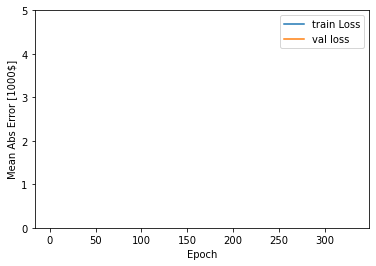

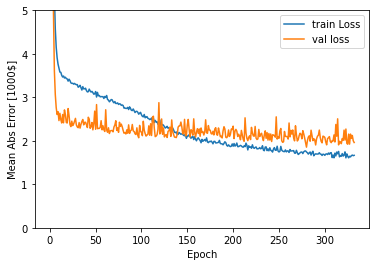

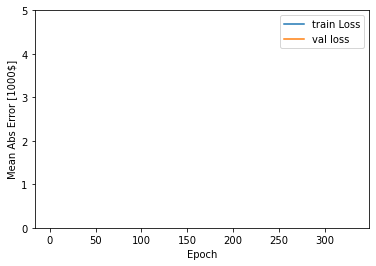

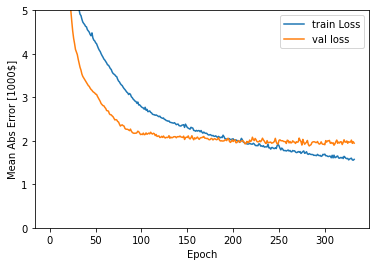

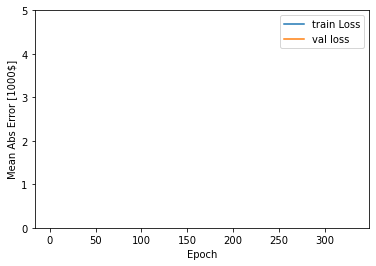

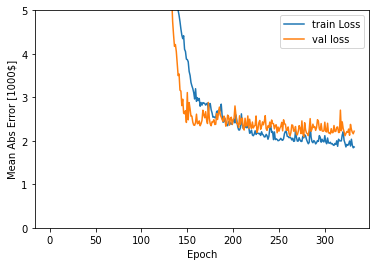

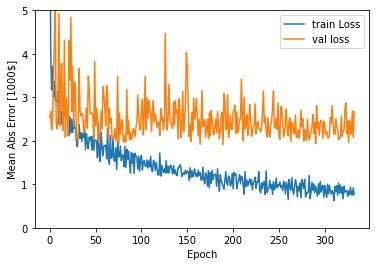

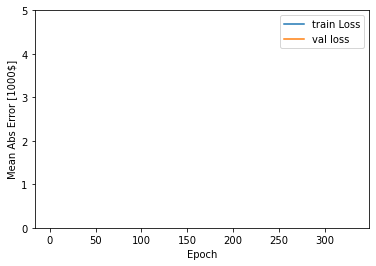

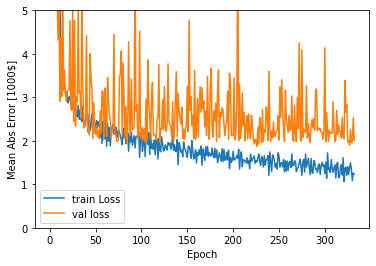

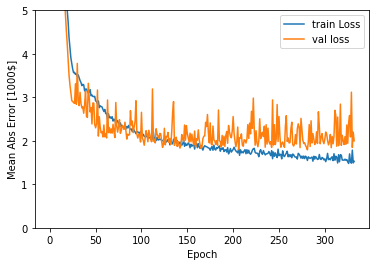

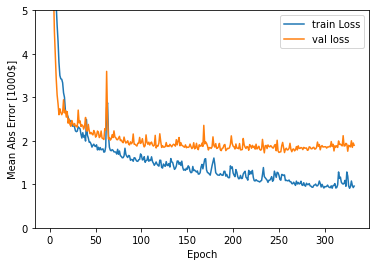

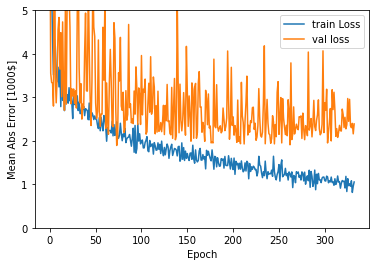

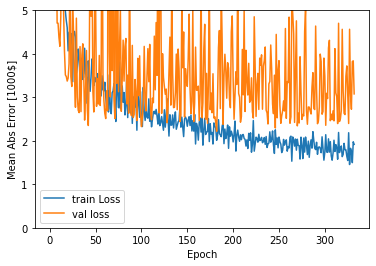

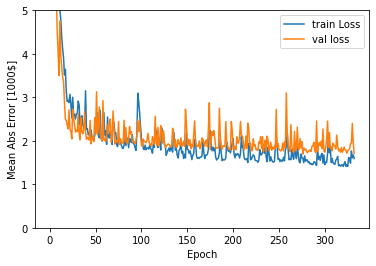

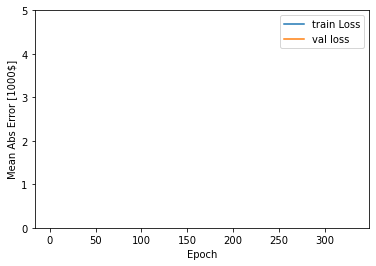

In [30]:
for history in models_dict['model_historys']:
    #keys_list = list(history.history.keys())
    #print(keys_list)
    plot_history(history)

Тест код для одной модели


...............................................................................

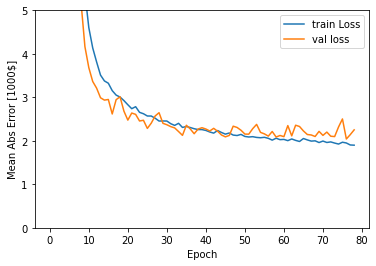

In [31]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [32]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))


Testing set Mean Abs Error: $2969.95


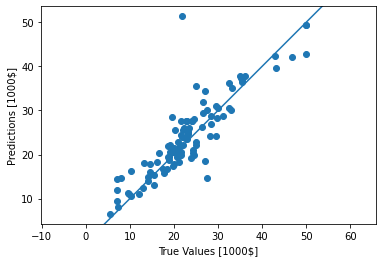

In [33]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

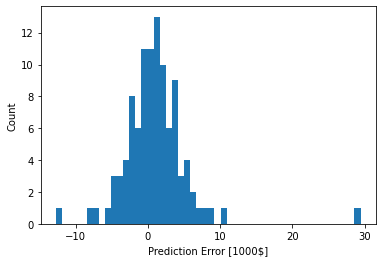

In [34]:
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [1000$]")
_ = plt.ylabel("Count")